In [1]:
station_name = "Vienna"
iterations = 300000
mask_years = [2019]
measurements_folder = f"./measurements/{station_name.capitalize()}"

In [2]:
# these imports are used indirectly and are not used in this script, just listed here for reference

import os
import numpy as np
import pandas as pd
import xarray as xr
import tempfile
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from utils.utils import pretty_lat, pretty_lon, ProgressStatus, plot_n_steps_of_area_from_nc_file

In [3]:
from station.data_submission import DataSubmission


from train_station_twin.training_executer import TrainingExecuter
%matplotlib inline
from utils.utils import plot_measurements_df


Extracting Vienna...


100%|██████████| 1857/1857 [02:55<00:00, 10.58it/s]
/home/k/k203179/digital-twin-for-weather-station/station/station.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plot_df = plot_df.reindex(pd.date_range(start=plot_df.index.min(),
/home/k/k203179/digital-twin-for-weather-station/station/station.py:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plot_df = plot_df.reindex(pd.date_range(start=plot_df.index.min(),


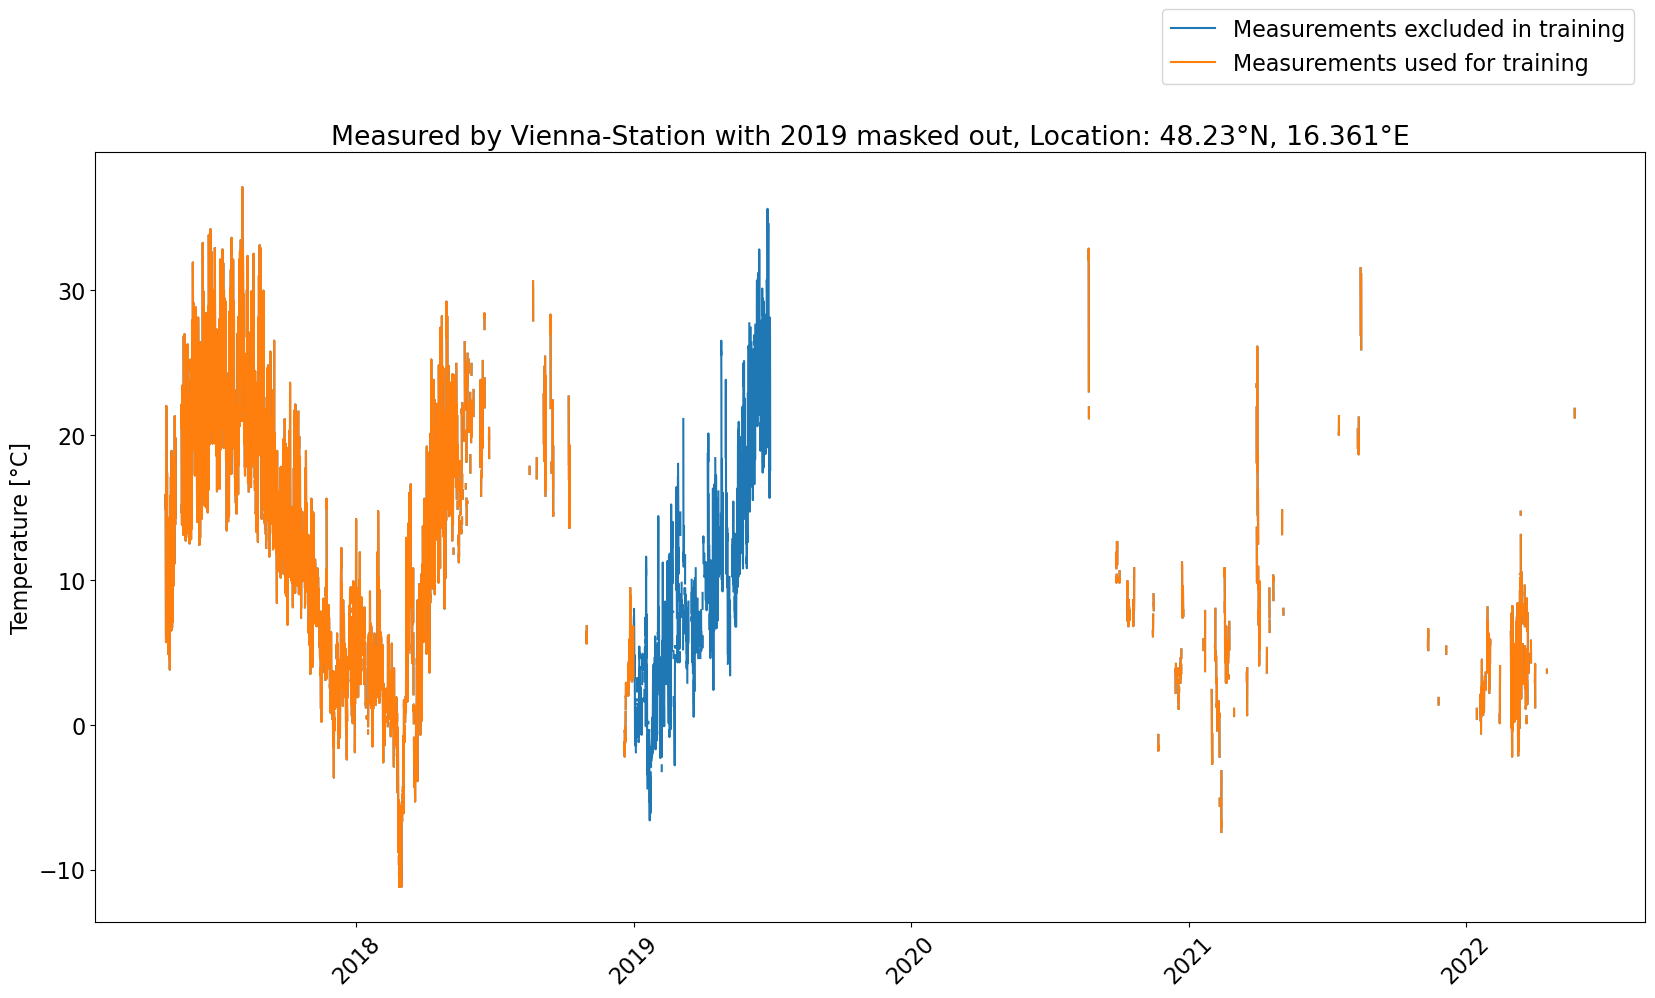

In [4]:
station_submission = DataSubmission(name=station_name, mask_years=mask_years)
station_submission.measurement_dir_path = measurements_folder

station_submission.initialize_station()

In [5]:
training = TrainingExecuter(
    station = station_submission.station,
    progress = station_submission.progress,
    iterations = iterations,
    local = True,
)
job_id = training.execute_with_sbatch()

(9593,)
Saving to ./executed_trainings/Vienna_20240521-2228/target_skaupj2w/train/vienna.nc
Downloading... 2017


2024-05-21 22:28:50,758 INFO Welcome to the CDS
2024-05-21 22:28:50,759 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-21 22:28:51,022 INFO Request is completed
2024-05-21 22:28:51,023 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data2/adaptor.mars.internal-1716321835.2402773-14018-2-a75e5f0a-710d-48ee-976c-710cb2f2562e.grib to /tmp/tmpi269gq0p/2017.grib (2.3M)
2024-05-21 22:28:51,554 INFO Download rate 4.2M/s   
2024-05-21 22:28:51,658 INFO Welcome to the CDS
2024-05-21 22:28:51,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


Downloading... 2018


2024-05-21 22:28:51,814 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data9/adaptor.mars.internal-1716305070.1286237-30432-13-10e0a43f-a6d5-4aec-80bc-db9a7f38c2f1.grib to /tmp/tmpi269gq0p/2018.grib (2.3M)
2024-05-21 22:28:52,382 INFO Download rate 4M/s     
2024-05-21 22:28:52,488 INFO Welcome to the CDS
2024-05-21 22:28:52,489 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


Downloading... 2020


2024-05-21 22:28:52,703 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data6/adaptor.mars.internal-1716305564.984818-14246-5-50e2b754-4c1b-4f1c-bda0-bac6cf4ef138.grib to /tmp/tmpi269gq0p/2020_8.grib (196.2K)
2024-05-21 22:28:53,075 INFO Download rate 528.4K/s
2024-05-21 22:28:53,179 INFO Welcome to the CDS
2024-05-21 22:28:53,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2024-05-21 22:28:53,342 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/adaptor.mars.internal-1716305598.2699645-24790-17-cc180cb0-90a4-4b42-8477-6625d09c4224.grib to /tmp/tmpi269gq0p/2020_9.grib (189.8K)
2024-05-21 22:28:53,703 INFO Download rate 527.7K/s
2024-05-21 22:28:53,808 INFO Welcome to the CDS
2024-05-21 22:28:53,808 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-21 22:28:53,958 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data2/adaptor.mars.internal-1716305620.2811038-13436-3-b3c67966-183e-48c2-8a96-0b2488dd2cd7.grib to /tmp/tmpi269gq0p/2020_10.grib (196.2K)


2024-05-21 22:28:54,355 INFO Download rate 494.5K/s
2024-05-21 22:28:54,458 INFO Welcome to the CDS
2024-05-21 22:28:54,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-21 22:28:54,567 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data3/adaptor.mars.internal-1716305671.1256313-8892-2-52e526dc-9250-422e-b4dd-8583e72b1b8b.grib to /tmp/tmpi269gq0p/2020_11.grib (189.8K)


2024-05-21 22:28:54,971 INFO Download rate 470.3K/s
2024-05-21 22:28:55,120 INFO Welcome to the CDS
2024-05-21 22:28:55,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-21 22:28:55,217 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data5/adaptor.mars.internal-1716305722.8409395-29470-17-b5d6167f-1e12-486c-8ae3-2b2acdd5e970.grib to /tmp/tmpi269gq0p/2020_12.grib (196.2K)


2024-05-21 22:28:55,409 INFO Download rate 1M/s
2024-05-21 22:28:55,514 INFO Welcome to the CDS
2024-05-21 22:28:55,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-21 22:28:55,624 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/adaptor.mars.internal-1716322400.0202093-16078-8-070ec67b-f447-45ac-9a56-145061d999cf.grib to /tmp/tmpi269gq0p/2021.grib (2.3M)


Downloading... 2021


2024-05-21 22:28:55,921 INFO Download rate 7.6M/s  
2024-05-21 22:28:56,025 INFO Welcome to the CDS
2024-05-21 22:28:56,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-21 22:28:56,133 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/adaptor.mars.internal-1716306137.8515413-6996-15-66eda3ed-d8b8-4773-be16-7f4dbbada93e.grib to /tmp/tmpi269gq0p/2022_1.grib (196.2K)


Downloading... 2022


2024-05-21 22:28:56,458 INFO Download rate 605.2K/s
2024-05-21 22:28:56,567 INFO Welcome to the CDS
2024-05-21 22:28:56,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2024-05-21 22:28:56,933 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/adaptor.mars.internal-1716306173.2406828-26630-8-f0440fa0-95fb-4c89-a07f-cb4ffa362ca8.grib to /tmp/tmpi269gq0p/2022_2.grib (177.2K)
2024-05-21 22:28:57,257 INFO Download rate 547.8K/s
2024-05-21 22:28:57,361 INFO Welcome to the CDS
2024-05-21 22:28:57,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-21 22:28:57,500 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/adaptor.mars.internal-1716306208.9195397-13074-17-898aef59-6a3d-4be3-b09d-2f91021c53c1.grib to /tmp/tmpi269gq0p/2022_3.grib (196.2K)


2024-05-21 22:28:57,630 INFO Download rate 1.5M/s
2024-05-21 22:28:57,734 INFO Welcome to the CDS
2024-05-21 22:28:57,735 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-21 22:28:57,868 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data9/adaptor.mars.internal-1716306244.2464733-20514-14-25b35794-d8e3-4051-970f-ca0762abae86.grib to /tmp/tmpi269gq0p/2022_4.grib (189.8K)


2024-05-21 22:28:58,259 INFO Download rate 486.2K/s
2024-05-21 22:28:58,378 INFO Welcome to the CDS
2024-05-21 22:28:58,378 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-21 22:28:58,502 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data4/adaptor.mars.internal-1716293141.3645952-26489-4-53c71486-5b2a-486e-95ad-5978900f756c.grib to /tmp/tmpi269gq0p/2022_5.grib (196.2K)


2024-05-21 22:28:58,638 INFO Download rate 1.4M/s


Found 2020_12.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2020_12.nc
Found 2022_2.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2022_2.nc
Found 2020_10.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2020_10.nc
Found 2020_9.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2020_9.nc
Found 2022_5.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2022_5.nc
Found 2017.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2017.nc
Found 2022_1.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2022_1.nc
Found 2020_8.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2020_8.nc
Found 2021.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2021.nc
Found 2022_4.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2022_4.nc
Found 2022_3.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2022_3.nc
Found 2020_11.grib
Renamed variable var167 to tas in /tmp/tmpdrpvi1y1/2020_11.nc
Found 2018.grib
Renamed variable var167 to tas in /tmp

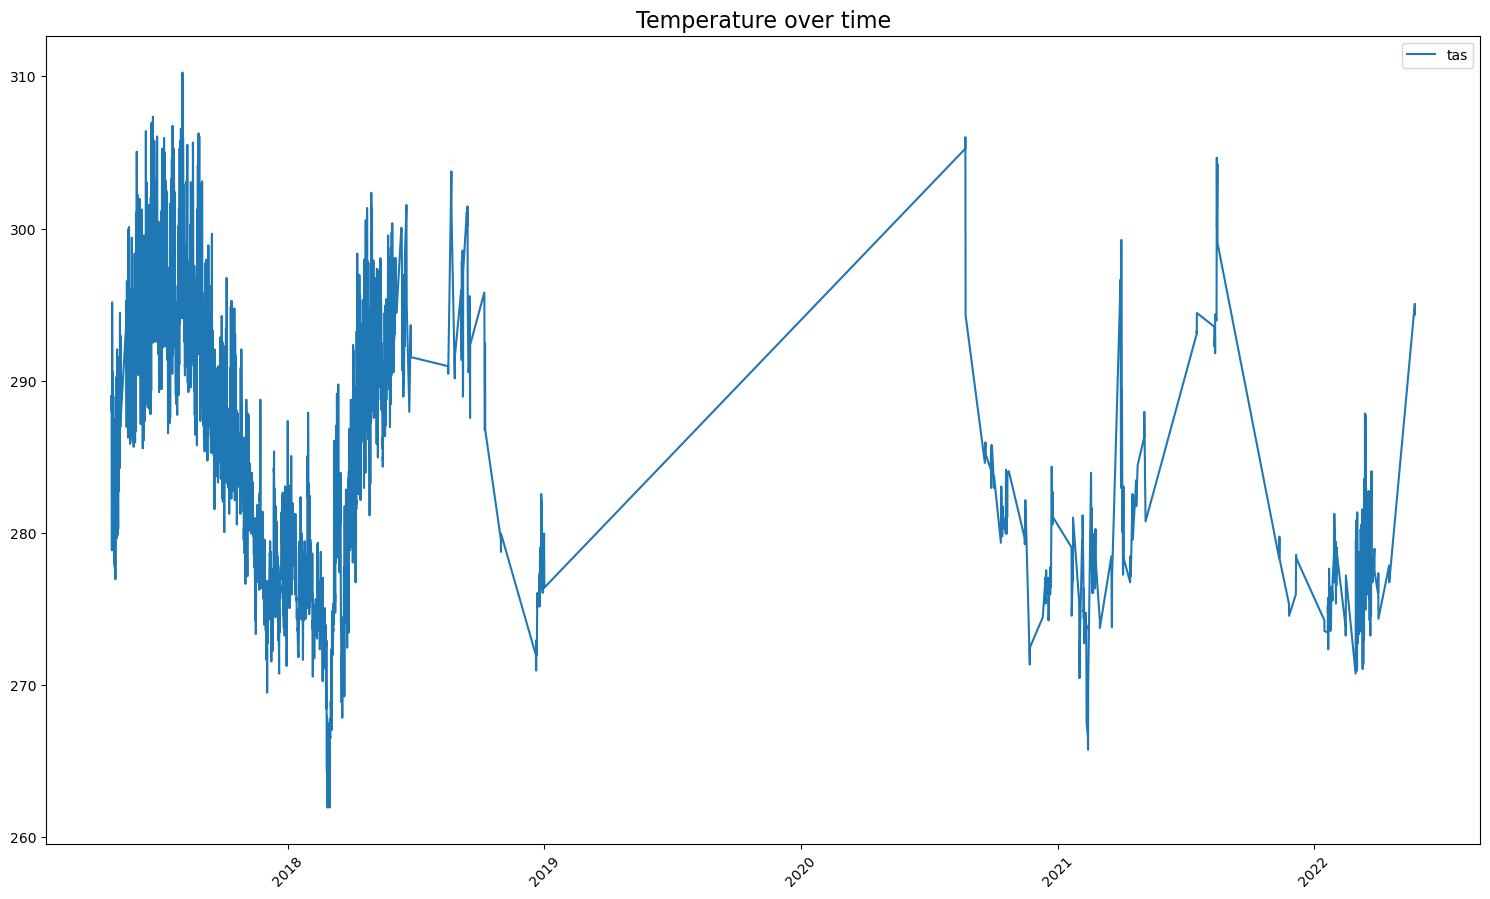

In [6]:
plot_measurements_df(station_submission.station.df)

In [7]:
print(f"Job ID: {job_id}")
print(f"tail -f {training.temp_dir.name}/slurm_logs/crai_crai-train_{job_id}.log")

Job ID: 10399663
tail -f ./executed_trainings/Vienna_20240521-2228/temp_gik_7m0t/slurm_logs/crai_crai-train_10399663.log


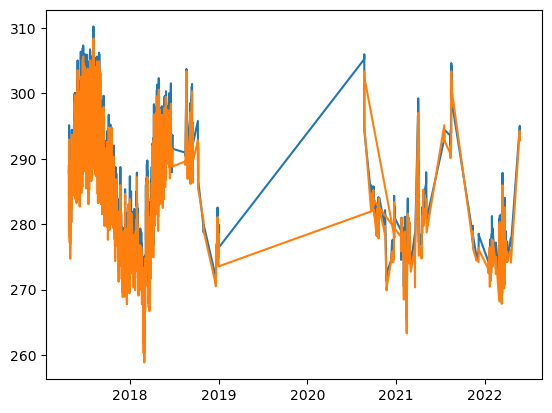

In [17]:
st = "executed_trainings/Vienna_20240521-2228/target_skaupj2w/train/vienna.nc"
e5 = "executed_trainings/Vienna_20240521-2228/target_skaupj2w/train/era5_merged.nc"

dst = xr.open_dataset(st)
de5 = xr.open_dataset(e5)

plt.plot(station_submission.station.df.index, station_submission.station.df["tas"], label="station")
plt.plot(de5["time"], de5["tas"].mean(axis=(1,2)), label="era5")